In [2]:
##There is an issue in the underlying statsmodels implementation which is no longer existent in the 0.8.0 release.
# Due to this sns.displot (series) gives an error
#To resolve this , You basically have the following two alternatives:
    #Use sns.distplot(myseries, bins=50, kde=False). This will of course not print the kde
    #uninstall statsmodel using conda or Pip and again install the version statsmodels=0.8
    
#using any of the below

#!conda uninstall statsmodels --yes [Did not try]
#!conda install -c taugspurger statsmodels=0.8.0[Did not try]

#!pip install --upgrade --no-deps statsmodels
#Output
    #Collecting statsmodels
 #Downloading https://files.pythonhosted.org/packages/77/2b/8ba61399b31f984c263b177c2e2547a34f0d4d972a24a51fc77c376079b0/statsmodels-0.9.0-cp36-cp36m-win_amd64.whl (7.0MB)
#Installing collected packages: statsmodels
 #Found existing installation: statsmodels 0.6.1
  #Uninstalling statsmodels-0.6.1:
   #   Successfully uninstalled statsmodels-0.6.1
#Successfully installed statsmodels-0.9.0

In [3]:
#!conda uninstall statsmodels --yes
#!conda install -c taugspurger statsmodels=0.8.0
!pip install --upgrade --no-deps statsmodels

Requirement already up-to-date: statsmodels in d:\mallikarjun\upxacademylearning\anaconda\lib\site-packages


You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
%matplotlib inline
%config InlineBackend.figure_format='svg'


from __future__ import division,print_function, absolute_import

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec

import seaborn as sns
import numpy as np
import pandas as pd

import os, sys
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

sns.set_context("poster",font_scale=1.3)

import missingno as msns
import pandas_profiling


In [5]:
!pip freeze

absl-py==0.2.2
alabaster==0.7.9
anaconda-client==1.6.0
anaconda-navigator==1.5
anaconda-project==0.4.1
appdirs==1.4.3
astor==0.7.1
astroid==1.4.9
astropy==1.3
Babel==2.3.4
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.5.3
bitarray==0.8.1
blaze==0.10.1
bokeh==0.12.4
boto==2.45.0
Bottleneck==1.2.0
cffi==1.9.1
chardet==2.3.0
chest==0.2.3
click==6.7
cloudpickle==0.2.2
clyent==1.2.2
colorama==0.3.7
comtypes==1.1.2
conda==4.5.6
configobj==5.0.6
contextlib2==0.5.4
cryptography==1.7.1
cycler==0.10.0
Cython==0.25.2
cytoolz==0.8.2
dask==0.13.0
datashape==0.5.4
decorator==4.0.11
dill==0.2.5
docutils==0.13.1
et-xmlfile==1.0.1
fastcache==1.0.2
Flask==0.12
Flask-Cors==3.0.2
future==0.16.0
gast==0.2.0
gevent==1.2.1
greenlet==0.4.11
grpcio==1.13.0
h5py==2.6.0
HeapDict==1.0.0
idna==2.2
imagesize==0.7.1
ipykernel==4.5.2
ipython==5.1.0
ipython-genutils==0.1.0
ipywidgets==5.2.2
isort==4.2.5
itsdangerous==0.24
jdcal==1.3
jedi==0.9.0
Jinja2==2.9.4
jsonschema==2.5.1
jupyter==1.0.0
jupyter-clien

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
def save_subgroup(dataframe,g_index,subgroup_name,prefix='raw_'):
    subgroup_filename=''.join([prefix,subgroup_name,'.csv.gz'])
    dataframe.to_csv(subgroup_filename,compression='gzip',encoding='UTF-8')
    test_df=pd.read_csv(subgroup_filename,compression='gzip',encoding='UTF-8',index=g_index)
    if dataframe.equals(test_df):
        print('Test passed, we could load the save subgroup package')
    else:
        print('Warning- Equvilence test failed!!')


In [7]:
def load_subgroup(subgroup_name,index_col=[0]):
    df= pd.read_csv(subgroup_name,compression='gzip',index_col=index_col)
    return df

In [8]:
cleaned_players=load_subgroup("cleaned_players.csv.gz")

players=load_subgroup("raw_players_.csv_gz")

cleaned_dyads=load_subgroup("cleaned_dyads.csv.gz",index_col=[0, 1])
agg_dyads=load_subgroup("raw_dyads_.csv_gz",index_col=[0, 1])

refrees=load_subgroup("raw_refree_.csv_gz")
countries=load_subgroup("raw_countries_.csv_gz")

In [9]:
cleaned_dyads.head(10)

redcard
refNum playerShort                
1      lucas-wilchez             0
2      john-utaka                0
4      aaron-hughes              0
       aleksandar-kolarov        0
       alexander-tettey          0
       anders-lindegaard         0
       andreas-beck              0
       antonio-rukavina          0
       antonio-rukavina          0
       ashkan-dejagah            0

In [10]:
cleaned_players.head()

,height,weight,SkinTone,position_agg,heightclass,skintoneclass,birth_date,age_years
playerShort,,,,,,,,
aaron-hughes,182.0,71.0,0.125,Defense,mid_height,white,1979-11-08,39.0
aaron-hunt,183.0,73.0,0.125,Attacker,mid_height,white,1986-09-04,32.0
aaron-lennon,165.0,63.0,0.250,Midfield,low_height,brown,1987-04-16,31.0
aaron-ramsey,178.0,76.0,0.000,Midfield,vlow_height,white,1990-12-26,28.0
abdelhamid-el-kaoutari,180.0,73.0,0.250,Defense,vlow_height,brown,1990-03-17,28.0


In [11]:
# Let us merge these two datasets and have one
Merged_dataframe=cleaned_dyads.reset_index().set_index("playerShort").merge(cleaned_players,left_index=True,right_index=True)

In [12]:
Merged_dataframe.head()

,refNum,redcard,height,weight,SkinTone,position_agg,heightclass,skintoneclass,birth_date,age_years
playerShort,,,,,,,,,,
aaron-hughes,4,0,182.0,71.0,0.125,Defense,mid_height,white,1979-11-08,39.0
aaron-hughes,66,0,182.0,71.0,0.125,Defense,mid_height,white,1979-11-08,39.0
aaron-hughes,77,0,182.0,71.0,0.125,Defense,mid_height,white,1979-11-08,39.0
aaron-hughes,77,0,182.0,71.0,0.125,Defense,mid_height,white,1979-11-08,39.0
aaron-hughes,77,0,182.0,71.0,0.125,Defense,mid_height,white,1979-11-08,39.0


In [13]:
Merged_dataframe.shape

(373067, 10)

In [14]:
cleaned_dyads.head(100)

redcard
refNum playerShort                   
1      lucas-wilchez                0
2      john-utaka                   0
4      aaron-hughes                 0
       aleksandar-kolarov           0
       alexander-tettey             0
       anders-lindegaard            0
       andreas-beck                 0
       antonio-rukavina             0
       antonio-rukavina             0
       ashkan-dejagah               0
       benedikt-hoewedes            0
       chris-baird                  0
       chris-brunt                  0
       daniel-schwaab               0
       dennis-aogo                  0
       george-mccartney             0
       gylfi-sigurdsson             0
       ivan-obradovic               0
       jan-moravek                  0
       jan-rosenthal                0
       jonny-evans                  0
       kyriakos-papadopoulos        0
       marko-marin                  0
       mats-hummels                 0
       mesut-oezil                  0
       milorad-pekovic              0
       nemanja-vidic                0
       nemanja-vidic                0
       neven-subotic                0
       neven-subotic                0
...                               ...
7      carl-medjani                 0
       carl-medjani                 0
       chahir-belghazouani          0
       chahir-belghazouani          0
       cheick-diabate               0
       david-gigliotti              1
       djibril-sidibe_2             0
       djibril-sidibe_2             0
       fabrice-begeorgi             1
       fabrice-begeorgi             0
       fabrice-begeorgi             0
       fahid-ben-khalfallah         0
       fahid-ben-khalfallah         0
       fallou-diagne                0
       fallou-diagne                0
       fallou-diagne                0
       florian-raspentino           0
       foued-kadir                  0
       foued-kadir                  0
       foued-kadir                  0
       fousseni-diawara             0
       franck-signorino             0
       franck-signorino             0
       frederic-sammaritano         0
       frederic-sammaritano         0
       frederic-sammaritano         0
       frederic-sammaritano         0
       frederic-sammaritano         0
       frederic-sammaritano         0
       gaetan-bong                  0

[100 rows x 1 columns]

In [15]:
cleaned_dyads.index.name

### do the univariate analysis of players to see the distributiob against games, redcard recieived etc

In [16]:
#group by players. Count the number of games played by each player
games_byPlayer=cleaned_dyads.groupby(level=1).count().sort_values('redcard',ascending=False)
games_byPlayer

,redcard
playerShort,
frank-lampard,914
xavi,816
iker-casillas,800
steven-gerrard,765
jamie-carragher,758
paul-scholes,736
rio-ferdinand,726
john-arne-riise,722
mark-schwarzer,722


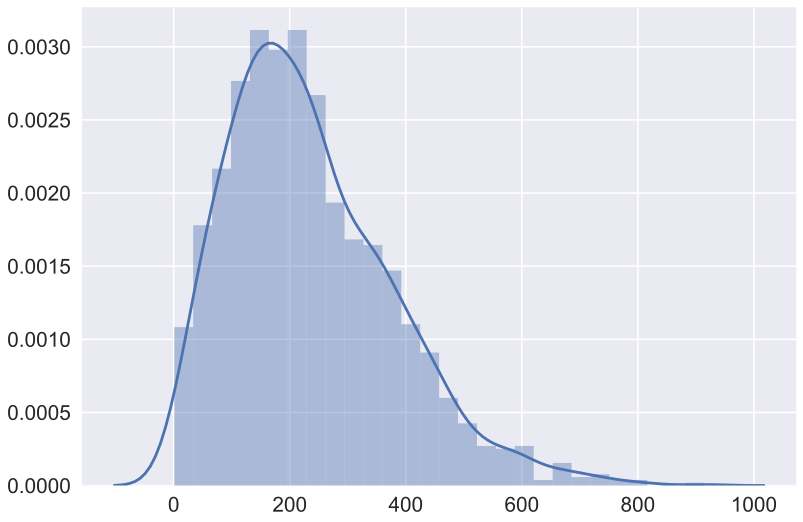

In [17]:
sns.distplot(games_byPlayer,kde=True)
#There are no cases that few players have players very large number of games than others

In [22]:
games_byPlayer.describe().T

,count,mean,std,min,25%,50%,75%,max
redcard,1585.0,235.373502,142.592308,1.0,131.0,213.0,322.0,914.0


In [24]:
games_byPlayer.median()
# as seen above in the histogram the data is skewed a littles toward left 

redcard    213.0
dtype: float64

In [81]:
#group by Refree
# count gives the number of games refereed
games_byRefree=cleaned_dyads.groupby(level=0).count().sort_values('redcard', ascending=True)
games_byRefree.rename(columns={'redcard':'total games refereed'})
#games_byRefree.to_csv('games_byRefree',compression='gzip',encoding='UTF-8')

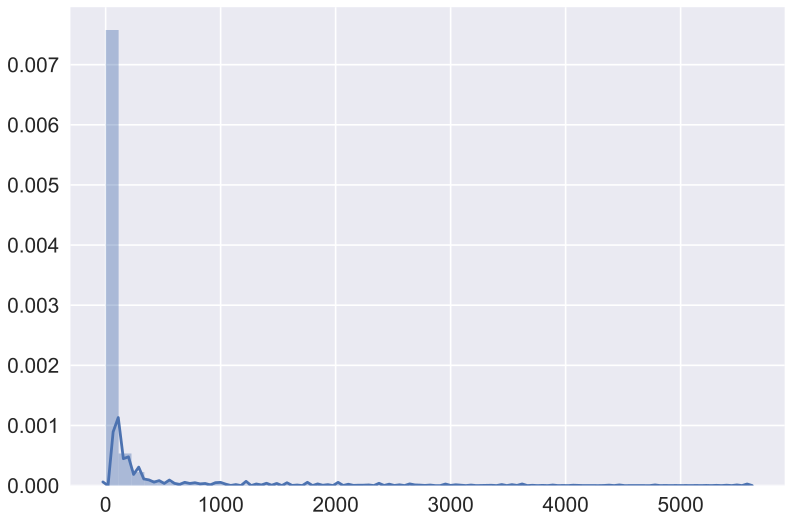

In [82]:
#sns.distplot(games_byRefree.query('refNum<1000'),kde=True,bins=int(5000/1000),norm_hist =False)
sns.distplot(games_byRefree,kde=True)

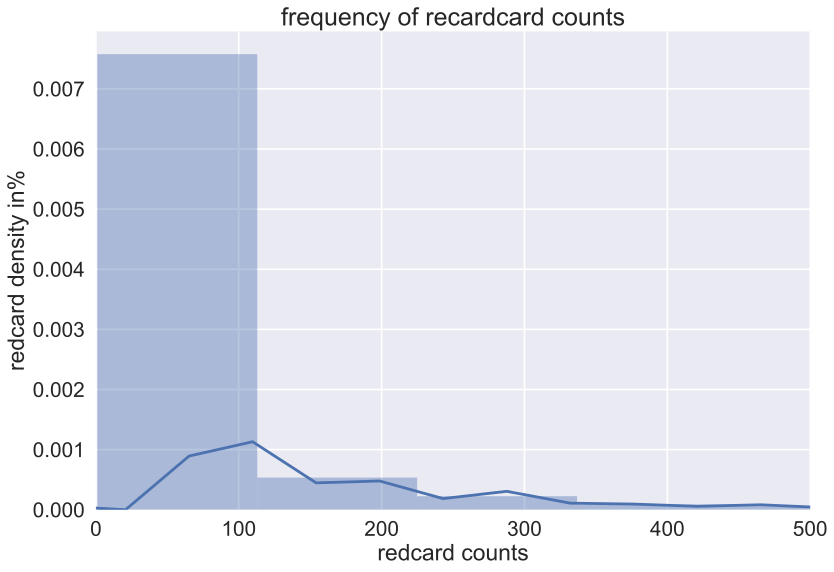

In [95]:
ax=sns.distplot(games_byRefree,kde=True)
# Set the `xlim` to 1000 to zoom in
ax.set(xlim=(0, 500))
plt.xlabel("redcard counts")
plt.ylabel("redcard density in%")
plt.title("frequency of recardcard counts") # You can comment this line out if you don't need title
plt.show()

In [ ]:
# group by Refree and take a sum of the redcards to know how many red cards were given by the refree
redCardGiven_byRefree=cleaned_dyads.groupby(level=0).sum().sort_values('redcard',ascending=False)
redCardGiven_byRefree.rename(columns={'redcard':'total red cards given'})
redCardGiven_byRefree

In [ ]:
sns.distplot(redCardGiven_byRefree,kde=False)

In [ ]:
# group by Players and take a sum of the redcards column to know how many redcard were recieved
redCardreceived_byplayers=cleaned_dyads.groupby(level=1).sum().sort_values('redcard',ascending=False)
redCardreceived_byplayers.rename(columns={'redcard':'total red cards received'})
redCardreceived_byplayers

In [ ]:
sns.distplot(redCardreceived_byplayers,kde=False)